In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import pandas as pd
import os
datapath = r"C:\Users\venkateshwarar\Desktop\firstsource\cooper"
os.chdir(datapath)
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
d1=pd.read_excel('Weekly data Refinance Volumes_upto_aug1.xlsx')

In [4]:
d1.head()

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,2018-12-31,1,1,2019,885.0,4.51,1.6,187.901424,1.700000,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2019-01-07,2,1,2019,1094.0,4.51,1.6,187.901424,2.160000,4.0,2.4,101.008462,101.0012,348680.142857,16027.8
2,2019-01-14,3,1,2019,1078.0,4.51,1.6,187.901424,2.195714,4.0,2.4,101.008462,101.0012,322446.857143,16027.8
3,2019-01-21,4,1,2019,1032.0,4.51,1.6,187.901424,1.747143,4.0,2.4,101.008462,101.0012,264000.714286,16027.8
4,2019-01-28,5,2,2019,989.0,4.51,1.5,188.841570,2.168571,3.8,2.4,101.065220,101.0591,251632.285714,16073.8


In [5]:
d1.tail()

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
196,2022-10-02,40,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
197,2022-10-09,41,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
198,2022-10-16,42,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
199,2022-10-23,43,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
200,2022-10-30,44,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        201 non-null    datetime64[ns]
 1   Week No                     201 non-null    int64         
 2   Month No                    201 non-null    int64         
 3   Year                        201 non-null    int64         
 4   Refinance                   188 non-null    float64       
 5   Mortgage Rate               201 non-null    float64       
 6   Inflation                   201 non-null    float64       
 7   Housing Price Index         201 non-null    float64       
 8   Treasury Yield              201 non-null    float64       
 9   Unemployment Rate           201 non-null    float64       
 10  GDP                         201 non-null    float64       
 11  Business Confidence Index   201 non-null    float64       

In [7]:
d1.shape

(201, 15)

In [8]:
d1.dtypes

Date                          datetime64[ns]
Week No                                int64
Month No                               int64
Year                                   int64
Refinance                            float64
Mortgage Rate                        float64
Inflation                            float64
Housing Price Index                  float64
Treasury Yield                       float64
Unemployment Rate                    float64
GDP                                  float64
Business Confidence Index            float64
Consumer Confidence Index            float64
Initial Unemployment Claim           float64
Disposable Income                    float64
dtype: object

In [9]:
#d1['Time']=pd.to_datetime(d1['Time'])

In [10]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
Week No,201.0,25.756219,14.752806,1.000000,13.000000,26.000000,38.000000,5.300000e+01
Month No,201.0,6.353234,3.371884,1.000000,3.000000,6.000000,9.000000,1.200000e+01
Year,201.0,2020.442786,1.099072,2019.000000,2019.000000,2020.000000,2021.000000,2.022000e+03
Refinance,188.0,2425.340426,961.250273,464.000000,1729.500000,2514.000000,2953.500000,4.636000e+03
Mortgage Rate,201.0,3.661015,0.852269,2.650000,2.980000,3.490000,4.080000,5.810000e+00
Inflation,201.0,3.925373,3.028267,0.100000,1.500000,2.300000,6.800000,9.100000e+00
Housing Price Index,201.0,226.880017,31.316747,187.901424,195.660059,217.835281,254.163779,2.826939e+02
Treasury Yield,201.0,1.608493,0.514188,0.758571,1.174286,1.587143,1.938000,3.012000e+00
Unemployment Rate,201.0,5.270647,2.608732,3.500000,3.600000,3.900000,6.000000,1.470000e+01
GDP,201.0,2.545274,12.083236,-31.200000,1.900000,2.500000,6.300000,3.380000e+01


In [11]:
d1.corr()

,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
Week No,1.000000,0.996016,-0.079961,0.109560,-0.091306,0.068320,0.104377,-0.203068,-0.012295,0.243292,-0.140269,-0.294710,-0.108628,-0.048424
Month No,0.996016,1.000000,-0.076145,0.108748,-0.096064,0.077024,0.112433,-0.199703,-0.021552,0.248530,-0.140870,-0.296843,-0.116258,-0.042619
Year,-0.079961,-0.076145,1.000000,-0.149954,0.249639,0.851703,0.953012,0.370420,-0.095542,0.018550,-0.891213,0.430231,-0.104241,0.761469
Refinance,0.109560,0.108748,-0.149954,1.000000,-0.791933,-0.538733,-0.314706,-0.800129,0.640794,-0.078027,0.107310,-0.543531,0.517789,0.165066
Mortgage Rate,-0.091306,-0.096064,0.249639,-0.791933,1.000000,0.535009,0.342911,0.802627,-0.447990,-0.109823,-0.285155,0.604182,-0.262231,-0.063043
Inflation,0.068320,0.077024,0.851703,-0.538733,0.535009,1.000000,0.940686,0.632321,-0.473086,0.064623,-0.759693,0.574503,-0.401744,0.476062
Housing Price Index,0.104377,0.112433,0.953012,-0.314706,0.342911,0.940686,1.000000,0.470021,-0.239176,0.080091,-0.894889,0.456975,-0.240102,0.671053
Treasury Yield,-0.203068,-0.199703,0.370420,-0.800129,0.802627,0.632321,0.470021,1.000000,-0.613565,-0.002383,-0.275263,0.725396,-0.476756,0.043985
Unemployment Rate,-0.012295,-0.021552,-0.095542,0.640794,-0.447990,-0.473086,-0.239176,-0.613565,1.000000,-0.263887,-0.098233,-0.452111,0.841997,0.294871
GDP,0.243292,0.248530,0.018550,-0.078027,-0.109823,0.064623,0.080091,-0.002383,-0.263887,1.000000,-0.022624,-0.090439,-0.420782,-0.034804


In [12]:
d1.isnull().sum()

Date                           0
Week No                        0
Month No                       0
Year                           0
Refinance                     13
Mortgage Rate                  0
Inflation                      0
Housing Price Index            0
Treasury Yield                 0
Unemployment Rate              0
GDP                            0
Business Confidence Index      0
Consumer Confidence Index      0
Initial Unemployment Claim     0
Disposable Income              0
dtype: int64

In [13]:
future_data  = d1[d1['Refinance'].isna()]

In [14]:
future_data.head(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
188,2022-08-08,32,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
189,2022-08-15,33,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [15]:
base_data = d1[~d1['Refinance'].isna()]

In [16]:
base_data.head(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,2018-12-31,1,1,2019,885.0,4.51,1.6,187.901424,1.70,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2019-01-07,2,1,2019,1094.0,4.51,1.6,187.901424,2.16,4.0,2.4,101.008462,101.0012,348680.142857,16027.8


In [17]:
base_data.tail(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
186,2022-07-25,30,7,2022,835.0,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
187,2022-08-01,31,8,2022,718.0,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [18]:
base_data.isna().sum()

Date                          0
Week No                       0
Month No                      0
Year                          0
Refinance                     0
Mortgage Rate                 0
Inflation                     0
Housing Price Index           0
Treasury Yield                0
Unemployment Rate             0
GDP                           0
Business Confidence Index     0
Consumer Confidence Index     0
Initial Unemployment Claim    0
Disposable Income             0
dtype: int64

In [19]:
base_data=base_data.drop('Date',axis=1)

In [20]:
x=base_data.drop('Refinance',axis=1)
y=base_data['Refinance']

In [21]:
x.head(2)

,Week No,Month No,Year,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,1,1,2019,4.51,1.6,187.901424,1.70,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2,1,2019,4.51,1.6,187.901424,2.16,4.0,2.4,101.008462,101.0012,348680.142857,16027.8


In [22]:
y.head(2)

0     885.0
1    1094.0
Name: Refinance, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=24)

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(169, 13) (19, 13) (169,) (19,)


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [29]:
def model_validation(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
    for i in models:
        rd=i()
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [30]:
pd.options.display.float_format='{:0.2f}'.format

In [31]:
validation_table_train = model_validation('train',X_train,X_test,y_train,y_test)

In [32]:
validation_table_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
1,<class 'sklearn.ensemble._forest.RandomForestR...,97.14,22330.37,149.43,4.83,0.97
2,<class 'sklearn.ensemble._bagging.BaggingRegre...,95.06,22725.18,150.75,4.97,0.97


In [33]:
validation_table_test = model_validation('test',X_train,X_test,y_train,y_test)

In [34]:
validation_table_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.tree._classes.DecisionTreeRegr...,349.47,319974.53,565.66,16.61,0.77
1,<class 'sklearn.ensemble._forest.RandomForestR...,314.87,220871.13,469.97,20.68,0.84
2,<class 'sklearn.ensemble._bagging.BaggingRegre...,337.17,252258.53,502.25,22.17,0.82


In [35]:
#Using Pearson Correlation

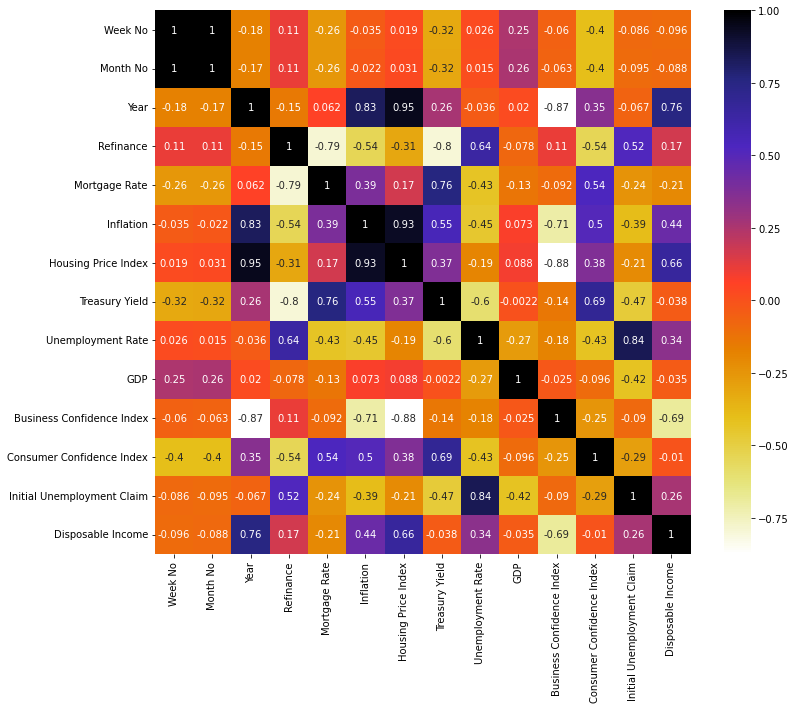

In [36]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = base_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [37]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation_check(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation_check(X_train, 0.8)
len(set(corr_features))

5

In [39]:
corr_features

{'Business Confidence Index',
 'Housing Price Index',
 'Inflation',
 'Initial Unemployment Claim',
 'Month No'}

In [40]:
base_data_upd = base_data.drop(corr_features,axis=1)

In [41]:
base_data.head(2)

,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,1,1,2019,885.00,4.51,1.60,187.90,1.70,4.00,2.40,101.01,101.00,329495.25,16027.80
1,2,1,2019,1094.00,4.51,1.60,187.90,2.16,4.00,2.40,101.01,101.00,348680.14,16027.80


In [42]:
base_data_upd.head(2)

,Week No,Year,Refinance,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,1,2019,885.00,4.51,1.70,4.00,2.40,101.00,16027.80
1,2,2019,1094.00,4.51,2.16,4.00,2.40,101.00,16027.80


In [43]:
x=base_data_upd.drop('Refinance',axis=1)
y=base_data_upd['Refinance']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=24)

In [45]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(169, 8) (19, 8) (169,) (19,)


In [46]:
validation_table_train_upd = model_validation('train',X_train,X_test,y_train,y_test)

In [47]:
validation_table_train_upd

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
1,<class 'sklearn.ensemble._forest.RandomForestR...,86.24,18553.80,136.21,4.53,0.98
2,<class 'sklearn.ensemble._bagging.BaggingRegre...,98.67,27750.88,166.59,5.15,0.97


In [48]:
validation_table_test_upd = model_validation('test',X_train,X_test,y_train,y_test)

In [49]:
validation_table_test_upd

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.tree._classes.DecisionTreeRegr...,350.21,311137.16,557.80,16.03,0.77
1,<class 'sklearn.ensemble._forest.RandomForestR...,314.71,255209.57,505.18,19.87,0.81
2,<class 'sklearn.ensemble._bagging.BaggingRegre...,295.44,249870.75,499.87,16.33,0.82


In [50]:
from sklearn.preprocessing import StandardScaler
def StandardScaler_of_data(x,X_train,X_test):    
    if x=='train':
        print("runningin in training mode")
        le=StandardScaler()
        le.fit(X_train)
        x=le.transform(X_train)
        dat1=pd.DataFrame(x)
        dat1.columns=X_train.columns
        data=dat1
    else:
        print("running in test mode")
        le=StandardScaler()
        le.fit(X_train)
        x=le.transform(X_test)
        dat1=pd.DataFrame(x)        
        dat1.columns=X_test.columns
        data=dat1
    return data

In [51]:
X_train_std = StandardScaler_of_data('train',X_train,X_test)

runningin in training mode


In [52]:
X_train.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
63,12,2020,3.36,1.15,4.40,-5.10,100.11,16444.30
185,29,2022,5.38,2.41,3.60,2.50,105.14,18423.06


In [53]:
X_train_std.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,-0.92,-0.31,-0.21,-0.83,-0.38,-0.61,-0.25,-0.99
1,0.23,1.60,2.63,1.79,-0.68,0.00,1.40,0.75


In [54]:
X_train.shape

(169, 8)

In [55]:
X_test_std = StandardScaler_of_data('test',X_train,X_test)

running in test mode


In [56]:
X_test.shape

(19, 8)

In [57]:
X_test.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
71,20,2020,3.26,0.97,13.20,-31.20,98.42,18024.00
54,3,2020,3.64,1.62,3.50,-5.10,101.64,16622.60


In [58]:
X_test_std.head(2) 

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,-0.38,-0.31,-0.35,-1.21,2.92,-2.72,-0.80,0.40
1,-1.53,-0.31,0.18,0.15,-0.71,-0.61,0.25,-0.83


In [59]:
validation_table_train_upd_new = model_validation('train',X_train_std,X_test_std,y_train,y_test)

In [60]:
validation_table_train_upd_new

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
1,<class 'sklearn.ensemble._forest.RandomForestR...,90.56,19600.42,140.00,4.72,0.98
2,<class 'sklearn.ensemble._bagging.BaggingRegre...,95.47,24436.96,156.32,4.72,0.97


In [61]:
validation_table_test_upd_new = model_validation('test',X_train_std,X_test_std,y_train,y_test)

In [62]:
validation_table_test_upd_new

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.tree._classes.DecisionTreeRegr...,381.68,363113.37,602.59,16.54,0.74
1,<class 'sklearn.ensemble._forest.RandomForestR...,289.09,236686.73,486.50,16.15,0.83
2,<class 'sklearn.ensemble._bagging.BaggingRegre...,316.84,251670.41,501.67,20.26,0.82


In [64]:
model = RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.9776645428859624
Test Accuracy: 0.8189990546513818


In [65]:
import pickle

In [66]:
# save the model to disk
filename = 'RF_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [67]:
X_train.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
63,12,2020,3.36,1.15,4.40,-5.10,100.11,16444.30
185,29,2022,5.38,2.41,3.60,2.50,105.14,18423.06


In [68]:
X_train.columns

Index(['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income'],
      dtype='object')

In [69]:
future_data.head(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
188,2022-08-08,32,8,2022,NaN,5.41,9.10,274.25,2.38,3.60,2.50,96.60,105.14,213138.56,18423.06
189,2022-08-15,33,8,2022,NaN,5.41,9.10,274.25,2.38,3.60,2.50,96.60,105.14,213138.56,18423.06


In [70]:
pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]

In [71]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_model.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Refinance_Pred'] = y_pred
    
    return future_data

In [72]:
preds = predictions_on_future_data(future_data)

[764.56 764.56 764.56 764.56 764.56 764.56 764.56 764.56 764.56 764.56
 764.56 764.56 764.56]


C:\Users\venkateshwarar\AppData\Local\Temp\ipykernel_11908\3509602341.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Refinance_Pred'] = y_pred


In [73]:
preds.to_excel("predictions_on_future_data.xlsx",index=False)

In [74]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['mse','mae']
# Create the parameters grid

param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['mse', 'mae'], 'max_features': ['auto'], 'max_depth': [2, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6], 'bootstrap': [True, False]}


In [75]:
from sklearn.model_selection import GridSearchCV
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [76]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': [2, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [77]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 10}

In [78]:
rf_tuned = RandomForestRegressor(n_estimators=500,criterion='mae',max_features='auto', max_depth=2,min_samples_split=2,min_samples_leaf=4,bootstrap=True,n_jobs=-1, random_state=102)

In [79]:
rf_tuned.fit(X_train, y_train)
print("Train Accuracy:",rf_tuned.score(X_train, y_train))
print("Test Accuracy:",rf_tuned.score(X_test, y_test))

Train Accuracy: 0.7870880612830115
Test Accuracy: 0.7517376178903965


In [80]:
def model_validation_rf(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[RandomForestRegressor]
    for i in models:
        rd=i(n_estimators=300,criterion='mae',max_features='auto', max_depth=2,min_samples_split=2,min_samples_leaf=4,bootstrap=True,n_jobs=-1, random_state = 102)
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [81]:
val_table_rf_train = model_validation_rf('train',X_train,X_test,y_train,y_test)

In [82]:
val_table_rf_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,296.39,181413.60,425.93,14.39,0.79


In [83]:
val_table_rf_test = model_validation_rf('test',X_train,X_test,y_train,y_test)

In [84]:
val_table_rf_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,399.13,343926.05,586.45,30.12,0.75


In [85]:
# save the model to disk
filename = 'RF_tuned.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [86]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_tuned.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Refinance_Pred'] = y_pred
    
    return future_data

In [87]:
preds_tuned1 = predictions_on_future_data(future_data)

[840.077 840.077 840.077 840.077 840.077 840.077 840.077 840.077 840.077
 840.077 840.077 840.077 840.077]


C:\Users\venkateshwarar\AppData\Local\Temp\ipykernel_11908\1062656913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Refinance_Pred'] = y_pred


In [88]:
# predictions on entire data
preds_tuned = predictions_on_future_data(d1)

[1492.895 1061.913  924.54  1445.779  945.688 1230.829 1305.939 1574.963
 1039.075 1039.075 1185.131 1508.445 1519.416 1754.764 1752.755 1910.904
 1661.805 1661.805 1720.592 1763.26  1766.01  1944.069 1909.39  2143.207
 2149.898 2098.985 2348.743 2247.964 2247.964 2159.775 2265.382 2325.274
 2582.759 2582.759 2582.759 2609.194 2583.516 2581.792 2349.646 2581.299
 2580.332 2606.05  2461.619 2321.506 2242.139 2475.186 2321.506 2524.175
 2494.611 2494.611 2346.372 2363.021 2366.773 2436.734 2581.346 2609.898
 2583.773 2586.465 2586.465 2620.523 2614.05  2628.484 2654.272 2620.711
 2651.088 3490.906 3490.906 3490.906 3490.906 3490.906 3468.507 3466.776
 3466.776 3466.776 3440.988 3447.409 3463.269 3465.31  3428.378 3428.378
 3428.378 3424.626 3423.476 3411.229 3411.229 3411.229 3411.229 3391.17
 3391.17  3391.17  3391.17  3357.917 3330.829 3357.917 3324.356 3324.356
 3354.684 3385.381 3349.972 3388.009 3339.37  3339.37  3337.587 3371.148
 3308.741 3384.464 3372.75  3415.984 3377.542 3175.3

In [89]:
preds_tuned1.to_excel("predictions_on_refinance_future_data2.xlsx", index=False)

In [90]:
preds_tuned.to_excel("predictions_on_refinance_entire_data3.xlsx", index=False)